In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 499.5, 499.5, -0.5)

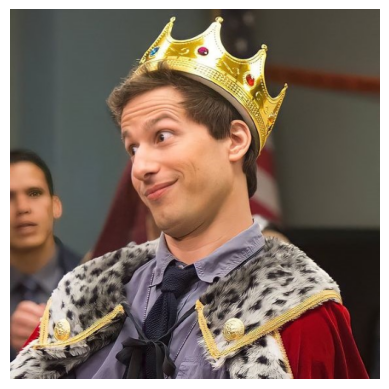

In [2]:
img = cv2.imread('images/jake peralta.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

In [3]:
def show_img(ax, img, title=None):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis('off');

# Edge based segmentation

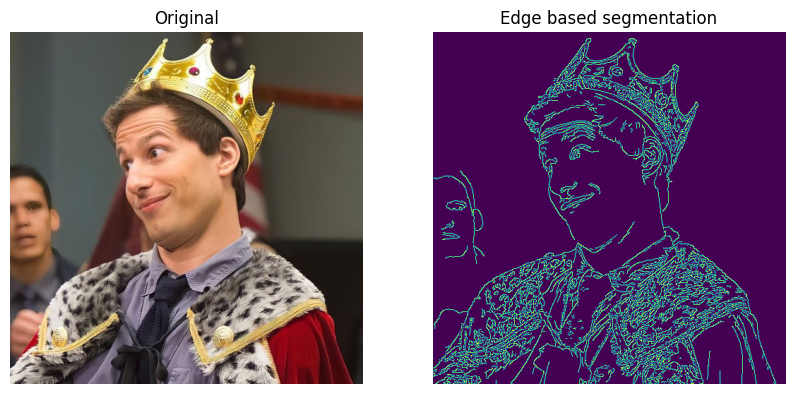

In [4]:
edges = cv2.Canny(img, 100, 200)
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
show_img(axs[0], img, 'Original')
show_img(axs[1], edges, 'Edge based segmentation')

# Region based segmentation

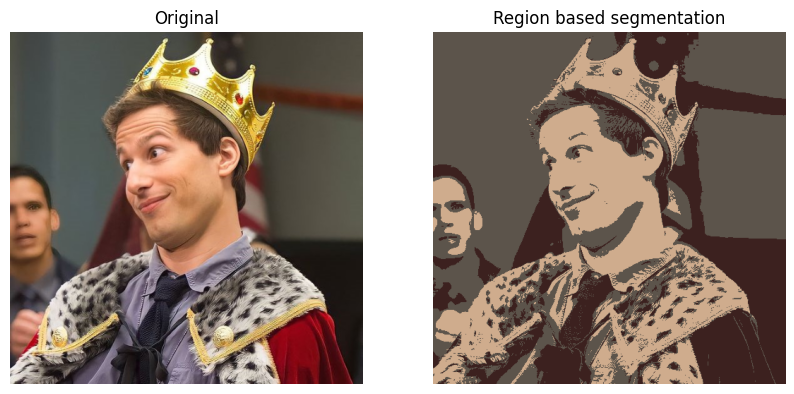

In [5]:
pixels = img.reshape((-1, 3))
pixels = np.float32(pixels)

criteria = ((cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2))
k = 3
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

centers = np.uint8(centers)
segmented_img = centers[labels.flatten()]
segmented_img = segmented_img.reshape(img.shape)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
show_img(axs[0], img, 'Original')
show_img(axs[1], segmented_img, 'Region based segmentation')